<a href="https://colab.research.google.com/github/SSRaylia/Optimization/blob/master/Optimization_with_Sensitivity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BackGround

 **Assume for Washington Post, the Sports section gets six million views per day and the National section get five million views per day. Assume four companies, GEICO, Delta, T-Mobile and Capital One, wish to advertise on the Sports and National sections.**
 
**For each company, the contract specifies the number of times its display ads are shown in these two sections. The contracts sometimes also specify a total number of page views that can originate from any section of the newspaper as below. Assume that the contract also specifies that The Washington Post receives 2.40 dollar per click-through from each of the four companies. However, not every page view leads to a click. If every 1000 views leads to 5 clicks, the click-through rate is 0.5%.**

![替代文字](https://raw.githubusercontent.com/SSRaylia/Optimization/master/Capture.PNG)

# A. Specify the Optimization Problem

The objective is to maximize advertising revenues. These revenues are driven by the cost per click charged to the advertisers and the click-through rates (CTR).

Let $\kappa_{ij}$ be the CTR of advertiser $i$ in category $j$. The objective function is thus:
\begin{equation}
Maximize \quad 2.4\times \sum_{i=1}^4\sum_{j=1}^{2}  \kappa_{ij}\times x_{ij}
\end{equation}



Constraints are as belows:

\begin{align}
x_{11}&\geq 2,000,000\\
x_{12}&\geq 1,000,000\\
x_{22}&\geq 1,000,000\\
x_{21}+x_{22}&\geq 2,000,000\\
x_{31}&\geq 1,000,000\\
x_{32}&\geq 1,000,000\\
x_{31}+x_{32}&\geq 3,000,000\\
x_{41}+x_{42}&\geq 2,000,000\\
\end{align}

"Assume that the Sports section gets six million views per day and the National section
get five million views per day"
This statement gives two constraints:
\begin{align}
\sum_{i=1}^{4}x_{i1}&\leq 6,000,000\\
\sum_{i=1}^{4}x_{i2}&\leq 5,000,000\\
\end{align}

Non-negativity constraints are
\begin{equation}
x_{ij}\geq 0
\end{equation}

# B. Find the optimal solution with all the decision variables and the optimal objective function value.

In [0]:
import math
import numpy as np
import pandas as pd
from cvxopt import matrix
from cvxopt.modeling import variable
from cvxopt.modeling import op
# Definition of the Variables
x11 = variable(1,'Geico Sports')
x12 = variable(1,'Geico National')
x21 = variable(1,'Delta Sports')
x22 = variable(1,'Delta National')
x31 = variable(1,'T-Mobile Sports')
x32 = variable(1,'T-Mobile National')
x41 = variable(1,'Capital One Sports')
x42 = variable(1,'Capital One National')

# Definition of the Constraints
c1=( x11>= 2000000 )
c2=( x12>= 1000000 )
c3=( x22>= 1000000 )
c4=( x21+x22>= 2000000 )
c5=(x31>=1000000)
c6=(x32>=1000000)
c7=(x31+x32>=3000000)
c8=(x41+x42>=2000000)
c9=(x11+x21+x31+x41<=6000000)
c10=(x12+x22+x32+x42<=5000000)
c11=(x21>=0)
c12=(x41>=0)
c13=(x42>=0)

#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

#Revenue is called "OF" for "Objective Function" 
OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4

#Solving the problem
OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13]) #op() is from cvxopt.modeling, first you define the objective function nd then the set of constraints
OA.solve()

def mk_df(vars):
  """Make dataframe from solved variables"""
  records = {}
  for var in vars:
    out = np.array(var.value)
    value = out.tolist()[0].pop()
    print(value)
    records[var.name] = [value]
  df = pd.DataFrame(records)
  return df
df = mk_df(vars = [x11, x12, x21, x22, x31, x32, x41, x42])


     pcost       dcost       gap    pres   dres   k/t
 0: -4.3515e+05  1.6295e+06  1e+07  2e-01  3e+00  1e+00
 1: -4.4973e+05 -2.5474e+05  5e+05  1e-02  2e-01  2e+04
 2: -4.8857e+05 -4.5508e+05  7e+04  2e-03  4e-02  5e+03
 3: -5.1563e+05 -5.0745e+05  2e+04  5e-04  8e-03  1e+03
 4: -5.2301e+05 -5.2284e+05  3e+02  1e-05  2e-04  2e+01
 5: -5.2320e+05 -5.2320e+05  3e+00  1e-07  2e-06  2e-01
 6: -5.2320e+05 -5.2320e+05  3e-02  1e-09  2e-08  2e-03
Optimal solution found.
2858687.107708355
1000000.0314623648
1000000.5005051724
1000000.0479613038
1000000.1039695219
2141312.0561706545
1141312.2662753903
858687.8398167578


In [0]:
print("The optimal objective function value is:")
print((-OA.objective.value()))
print("The value of the decision variables are:")
df.head()

The optimal objective function value is:
[ 5.23e+05]

The value of the decision variables are:


,Geico Sports,Geico National,Delta Sports,Delta National,T-Mobile Sports,T-Mobile National,Capital One Sports,Capital One National
0,2.858687e+06,1.000000e+06,1.000001e+06,1.000000e+06,1.000000e+06,2.141312e+06,1.141312e+06,858687.839817


# C. One Step Further on Checking Sensitivity (Assume Only One Section Changes at a Time )

![替代文字](https://raw.githubusercontent.com/SSRaylia/Optimization/master/Capture2.PNG)

In [0]:
result = np.array([[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3],[1,2,3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k11 = (2+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[0,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k12 = (0.1+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[1,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k21 = (1.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[2,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k22 = (0.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[3,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k31 = (0.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[4,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [     1,      2,      3],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k32 = (2.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[5,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [497504, 523199, 548895],
       [     1,      2,      3],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k41 = (1.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[6,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [497504, 523199, 548895],
       [523199, 536895, 550591],
       [     1,      2,      3]])

In [0]:
#Definition of the Objective Function
k11=2.5/100
k12=0.8/100
k21=2.0/100
k22=1.0/100
k31=1.0/100
k32=3.0/100
k41=1.5/100
k42=2.0/100

for i in [0,1,2]:
  k42 = (1.5+i*0.5)/100
  OF=( k11*x11 + k12*x12+ k21*x21 + k22*x22 + k31*x31+ k32*x32+k41*x41+k42*x42)*2.4
  OA=op(-OF,[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13])
  result[7,i] = int(np.array(-OA.objective.value()))
result

array([[488895, 523199, 557504],
       [506399, 518399, 530399],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [511199, 523199, 535199],
       [497504, 523199, 548895],
       [523199, 536895, 550591],
       [512895, 523199, 533504]])

In [0]:
result[0,2]-result[0,0]

68609

In [0]:
result[1,2]-result[1,0]

24000

In [0]:
result[2,2]-result[2,0]

24000

In [0]:
result[3,2]-result[3,0]

24000

In [0]:
result[4,2]-result[4,0]

24000

In [0]:
result[5,2]-result[5,0]

51391

In [0]:
#Variance for Capital One in Sports is only 0.5%
(result[6,1]-result[6,0])/0.5

27392.0

In [0]:
result[7,2]-result[7,0]

20609

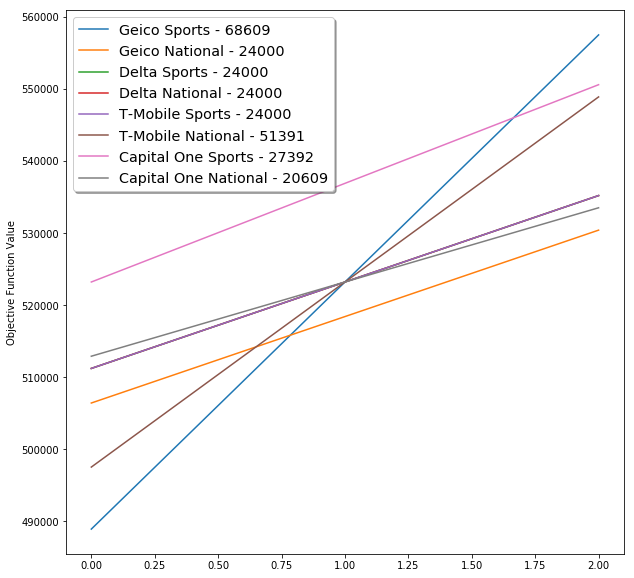

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(result[0,], label='Geico Sports - 68609')
plt.plot(result[1,], label='Geico National - 24000')
plt.plot(result[2,], label='Delta Sports - 24000')
plt.plot(result[3,], label='Delta National - 24000')
plt.plot(result[4,], label='T-Mobile Sports - 24000')
plt.plot(result[5,], label='T-Mobile National - 51391')
plt.plot(result[6,], label='Capital One Sports - 27392')
plt.plot(result[7,], label='Capital One National - 20609')

legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')


plt.ylabel('Objective Function Value')
plt.show()

## Sensitivity Analysis Conclustion


Based on the line plot and the calculated value of each line's slope above, we can see that the objective function value is most sensitive to changes of click-through rate of Geico in Sports section, followed by T-Mobile in National sections, and is least sensitive to Capital One in National section. It would be helpful if The Washington Post can work with Geico on designing more attractive advertisement in Sports section since it is the strongest revenue generator. 